In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/IPL.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
# Check the size of rows and columns of the dataset

print(f"Your rows are {df.shape[0]} and your columns are {df.shape[1]}")

Your rows are 74 and your columns are 20


In [5]:
# How many columns have null values in total

df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


Text(0.5, 1.0, 'Most match win by team')

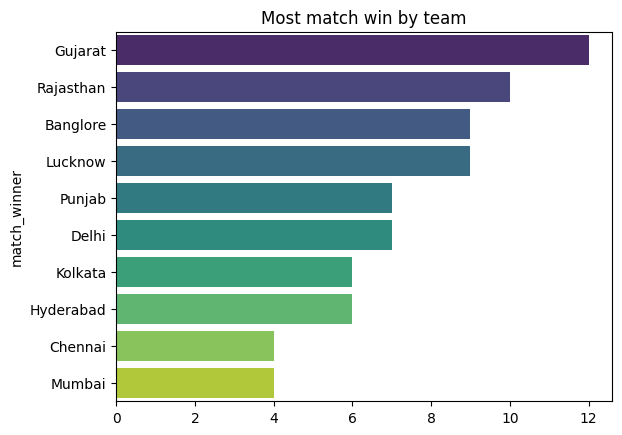

In [6]:
# Which team won the most matches

match_wins = df["match_winner"].value_counts()
sns.barplot(y = match_wins.index , x = match_wins.values,palette = "viridis")
plt.title("Most match win by team")

<Axes: xlabel='toss_decision', ylabel='count'>

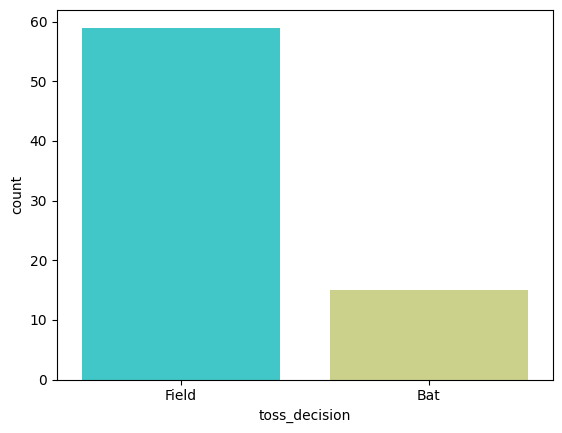

In [7]:
# Toss decision trend

sns.countplot(x = df['toss_decision'],palette = 'rainbow')

In [8]:
# Toss winner vs Match Winner

count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count*100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

<Axes: xlabel='won_by', ylabel='count'>

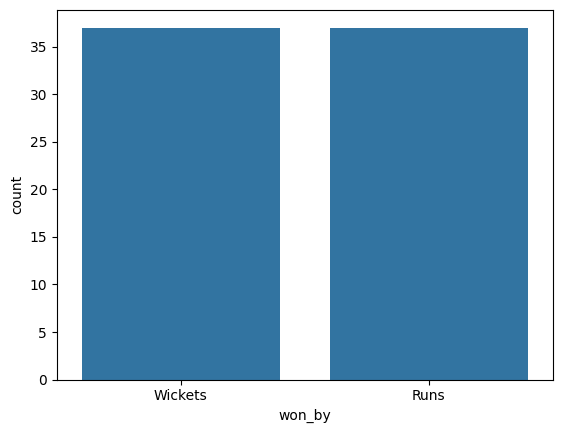

In [9]:
# How the teams won by (runs vs wickets)

sns.countplot(x = df["won_by"])

<Axes: ylabel='player_of_the_match'>

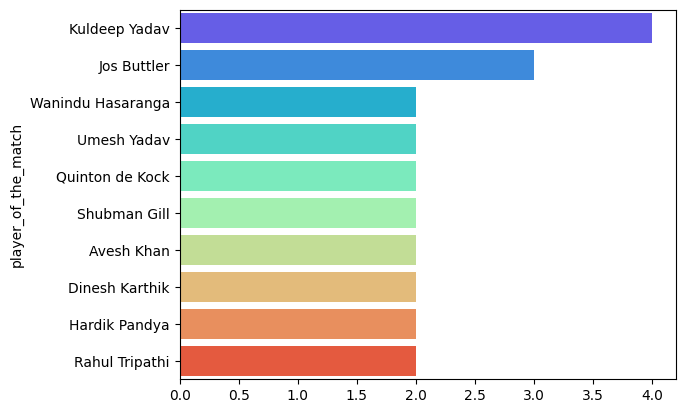

In [10]:
# Most player of the match awards

count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = count.values , y = count.index,palette = "rainbow")

In [11]:
#  2 Top scorers
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(2)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377


<Axes: ylabel='best_bowling'>

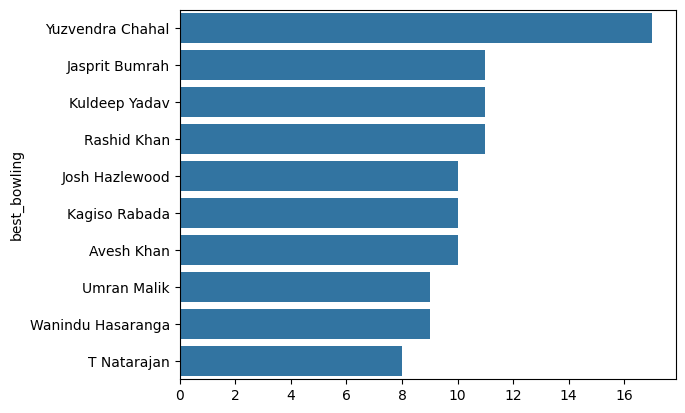

In [12]:
# 10 best bowling figure
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending = False).head(10)
sns.barplot(y = top_bowlers.index , x = top_bowlers.values)


<Axes: ylabel='venue'>

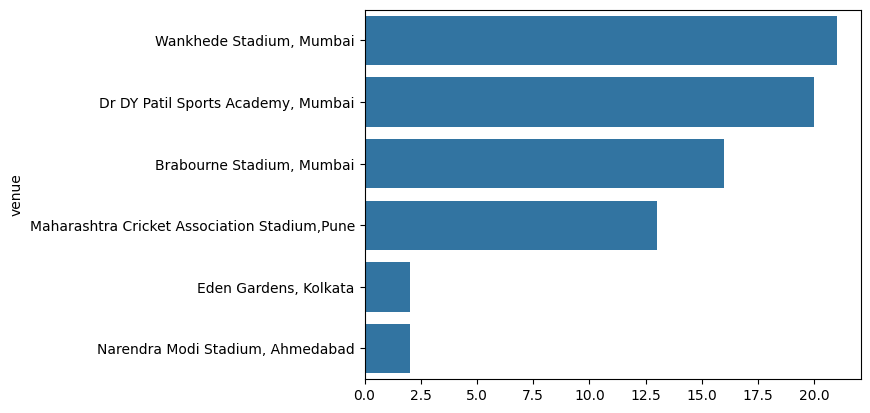

In [13]:
# Most matches played by value

venue_counts = df['venue'].value_counts()
sns.barplot(y = venue_counts.index , x = venue_counts.values)

In [14]:
# who won the highest margin by runs
high_winby_run = df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending = False).head(1)[['match_winner','margin']]
high_winby_run

,match_winner,margin
54,Chennai,91


In [33]:
# Which player had the highest individual score

high_score = df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]
high_score

,top_scorer,highscore
65,Quinton de Kock,140


In [42]:
# Which bowler had the best bowling figure

high_wicket = df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]
high_wicket

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
